In [1]:
%autosave 20
import matplotlib.pyplot as plt
import numpy as np

import astropy.utils.iers
astropy.utils.iers.conf.auto_download = False

Autosaving every 20 seconds


In [2]:
import astropy.units as u
import astropy.constants as c

c.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.9884754153381438e+30 uncertainty=9.236140093538353e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2014'>

In [3]:
c.au.cgs

<Quantity 1.49597871e+13 cm>

In [4]:
AU = c.au.cgs.value
AU

14959787070000.0

In [5]:
print(type(1*u.km))
print(type(u.km))

<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.core.PrefixUnit'>


In [6]:
a_mars = 1.5 * u.au
a_mars_km = a_mars.to_value(u.km)
type(a_mars_km)

float

In [7]:
v = 2*np.pi * 1*u.au / (1*u.year)
v.to(u.km / u.s)

<Quantity 29.78525437 km / s>

In [8]:
v = np.sqrt(c.G * c.M_earth / c.R_earth)

In [9]:
M = 10 * u.Msun
Ledd = 4*np.pi * c.G * c.m_p * c.c / c.sigma_T * M
display(Ledd)
# Ledd.to(u.erg/u.s**2)
display(Ledd.to(u.erg / u.s))
Ledd.decompose()

<Quantity 63.2175361 m2 solMass / s3>

<Quantity 1.25706516e+39 erg / s>

<Quantity 1.25706516e+32 kg m2 / s3>

In [10]:
a = (10*u.g)**(2/7 + 1/5)
display(a)

<Quantity 3.05994969 g(1/2)>

In [11]:
from fractions import Fraction as Fr
a = (10*u.g)**(Fr(2,7) + Fr(1,5))
display(a)

<Quantity 3.05994969 g(17/35)>

In [12]:
angle = 90*u.deg
display(np.sin(angle))
angle = 1*u.arcsec
1 / np.sin(angle)

<Quantity 1.>

<Quantity 206264.8062479>

In [13]:
assert u.Angstrom == u.AA == u.angstrom
assert 1*u.m == 1e2*u.cm == 1e3*u.mm == 1e6*u.micrometer == 1e-6*u.Mm
(1*u.mpc).to(u.pc)

<Quantity 0.001 pc>

In [14]:
micron = list(u.Angstrom.find_equivalent_units())[1]
(1*micron).to(u.cm)

<Quantity 6.957e+10 cm>

In [15]:
x = 10*u.cm / (100 * u.m)
display(x.to(u.dimensionless_unscaled))
x.value, x.unit

<Quantity 0.001>

(0.1, Unit("cm / m"))

In [16]:
delta_m = 1*u.mag
mAB = 10*u.ABmag  # u.STmag
m = mAB - delta_m
display(m.physical.to(u.erg/u.s/u.cm**2/u.Hz))

m1 = u.Magnitude(10 * u.count / u.s)
m2 = u.Magnitude(1e5 * u.count / u.hour)
display((m2 - m1).decompose() - delta_m)
m1.physical

<Quantity 9.12010839e-24 erg / (cm2 Hz s)>

<Magnitude -2.10924375 mag>

<Quantity 10. ct / s>

In [17]:
from astropy import coordinates as coord

display(coord.SkyCoord('05h35m17.3s -05d23m28s'))
display(coord.SkyCoord(ra=5*u.hourangle, dec=-5*u.deg-23*u.arcmin))
star = coord.SkyCoord('05h35m17.3s -05d23m28s')
display(star.galactic)
coord.SkyCoord(l=5*u.deg, b=-5*u.deg-23*u.arcmin, frame='galactic')
coord.SkyCoord(l=5*u.deg, b=-5*u.deg-23*u.arcmin, distance=1*u.kpc, frame='galactic')

<SkyCoord (ICRS): (ra, dec) in deg
    (83.82208333, -5.39111111)>

<SkyCoord (ICRS): (ra, dec) in deg
    (75., -5.38333333)>

<SkyCoord (Galactic): (l, b) in deg
    (209.01374582, -19.38160147)>

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (5., -5.38333333, 1.)>

In [18]:
from astropy.time import Time

t = Time.now()
loc = coord.EarthLocation.of_site('subaru')
# sai = coord.EarthLocation.of_address('Университетский проспект 13, Москва')
loc.geodetic
alt_az_frame = coord.AltAz(obstime=t, location=loc)
star.transform_to(alt_az_frame)

<SkyCoord (AltAz: obstime=2018-11-07 07:10:03.059219, location=(-5464468.109716696, -2493053.6504484517, 2150943.6050810195) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    (96.56492181, 2.31669402)>

<class 'astropy.coordinates.sky_coordinate.SkyCoord'>


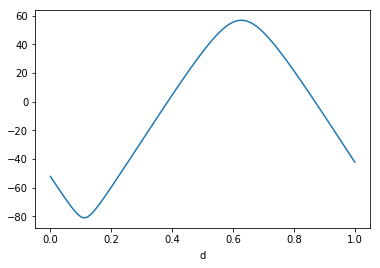

In [32]:
from astropy import visualization

dt = np.linspace(0, 1, 100) * u.day
t = Time.now() + dt
moon = coord.get_moon(t)
print(type(moon))
keck = coord.EarthLocation.of_site('Keck')
moon_altaz = moon.transform_to(
    coord.AltAz(location=keck)
)
with visualization.quantity_support():
    plt.plot(dt, moon_altaz.alt.to(u.deg))

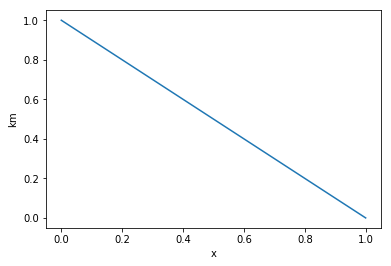

In [37]:
with visualization.quantity_support():
    x = np.linspace(0, 1, 100) * u.km
    y = np.linspace(1, 0, 100) * u.km
    plt.xlabel('x')
    plt.plot(x, y)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  800                                                  NAXIS2  =                  448                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

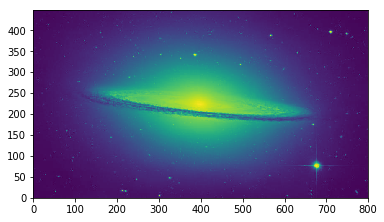

In [45]:
from astropy import io

with io.fits.open('sombrero.fits') as sombr:
    hdu = sombr[0]
    print(hdu.header)
    data = hdu.data
plt.imshow(data, origin='lower')


In [49]:
data = io.ascii.read('freddi.dat')
display(data)
io.ascii.write(data['t', 'Mdot'], 'table.tex', format='latex')

t,Mdot,Mdisk,Rhot,Cirrout,H2R,Teffout,Tirrout,Qiir2Qvisout,Lx,mU,mB,mV,mR,mI,mJ
float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64
0.0,0.00122746,2.62282e+25,1.36395,0,0.0990702,14251.3,0,0,0.0,14.9248,15.895,15.9793,15.9984,16.3256,16.2118
0.25,283455000000000.0,2.62594e+25,1.36395,0,0.0939382,13042.3,0,0,6.8279e+30,14.8542,15.8376,15.932,15.9589,16.2923,16.1819
0.5,3042750000000000.0,2.62726e+25,1.36395,0,0.0916451,12516.0,0,0,4.23856e+33,14.7935,15.7896,15.8933,15.9271,16.2658,16.1582
0.75,1.4496e+16,2.62809e+25,1.36395,0,0.090089,12163.8,0,0,8.52088e+34,14.7408,15.7485,15.8606,15.9006,16.2439,16.1388
1.0,4.62499e+16,2.62862e+25,1.36395,0,0.0888923,11895.7,0,0,5.40876e+35,14.6952,15.7134,15.8331,15.8785,16.2258,16.1228
1.25,1.1458e+17,2.62887e+25,1.36395,0,0.0879139,11678.3,0,0,1.96501e+36,14.6562,15.6837,15.81,15.8602,16.211,16.1097
1.5,2.3681e+17,2.62876e+25,1.36395,0,0.0870845,11495.3,0,0,5.13231e+36,14.6231,15.6588,15.7909,15.8451,16.1988,16.0991
1.75,4.26009e+17,2.62819e+25,1.36395,0,0.0863637,11337.1,0,0,1.07543e+37,14.5954,15.6381,15.7752,15.8329,16.1891,16.0906
2.0,6.86785e+17,2.627e+25,1.36395,0,0.0857263,11198.0,0,0,1.92413e+37,14.5724,15.6211,15.7625,15.8231,16.1814,16.0839


In [50]:
with open('table.tex') as fh:
    print(fh.read())

\begin{table}
\begin{tabular}{cc}
t & Mdot \\
0.0 & 0.00122746 \\
0.25 & 283455000000000.0 \\
0.5 & 3042750000000000.0 \\
0.75 & 1.4496e+16 \\
1.0 & 4.62499e+16 \\
1.25 & 1.1458e+17 \\
1.5 & 2.3681e+17 \\
1.75 & 4.26009e+17 \\
2.0 & 6.86785e+17 \\
2.25 & 1.01423e+18 \\
2.5 & 1.39589e+18 \\
2.75 & 1.81519e+18 \\
3.0 & 2.25477e+18 \\
3.25 & 2.69884e+18 \\
3.5 & 3.13446e+18 \\
3.75 & 3.55188e+18 \\
4.0 & 3.94435e+18 \\
4.25 & 4.30774e+18 \\
4.5 & 4.6399e+18 \\
4.75 & 4.94025e+18 \\
5.0 & 5.20926e+18 \\
5.25 & 5.44815e+18 \\
5.5 & 5.65858e+18 \\
5.75 & 5.8425e+18 \\
6.0 & 6.00196e+18 \\
6.25 & 6.13901e+18 \\
6.5 & 6.25569e+18 \\
6.75 & 6.3539e+18 \\
7.0 & 6.43547e+18 \\
7.25 & 6.50206e+18 \\
7.5 & 6.55523e+18 \\
7.75 & 6.59637e+18 \\
8.0 & 6.62678e+18 \\
8.25 & 6.64762e+18 \\
8.5 & 6.65994e+18 \\
8.75 & 6.66468e+18 \\
9.0 & 6.66269e+18 \\
9.25 & 6.65474e+18 \\
9.5 & 6.64151e+18 \\
9.75 & 6.62361e+18 \\
10.0 & 6.60159e+18 \\
10.25 & 6.57595e+18 \\
10.5 & 6.54711e+18 \\
10.75 & 6.51549e+18 \